<center><img src="https://user-images.githubusercontent.com/32812860/243827084-3162bcb4-a62e-443c-83fa-aaf16e4b8fd1.gif" width="600px;"></center>

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local news reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Some imports, configuration and loading dataset

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

## Initial Data Exploration

- **What is the shape of the DataFrames?**
- **How many rows and columns do they have?**
- **What are the column names?**
- **Are there any NaN values or duplicates?**

In [5]:
dfs = [df_hh_income, df_pct_poverty, df_pct_completed_hs, df_share_race_city, df_fatalities]

for idx, df in enumerate(dfs):
    print(f"dfs[{idx}]")
    print("ROWS | COLUMNS")
    print(df.shape)
    print("COLUMN NAMES")
    print(df.columns)
    if(df.isna().values.any()):
        print(f"dfs[{idx}] has NaN values")
    if(df.duplicated().values.any()):
        print(f"dfs[{idx}] has duplicated values")
    print("--------------------------------------")

dfs[0]
ROWS | COLUMNS
(29322, 3)
COLUMN NAMES
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
dfs[0] has NaN values
--------------------------------------
dfs[1]
ROWS | COLUMNS
(29329, 3)
COLUMN NAMES
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
--------------------------------------
dfs[2]
ROWS | COLUMNS
(29329, 3)
COLUMN NAMES
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
--------------------------------------
dfs[3]
ROWS | COLUMNS
(29268, 7)
COLUMN NAMES
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
--------------------------------------
dfs[4]
ROWS | COLUMNS
(2535, 14)
COLUMN NAMES
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
dfs[4] has NaN values
------

Looks like we have some missing values in *df_hh_income* and *df_fatalities*

In [6]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [7]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

## Data Cleaning

We have to **deal with the NaN values before proceeding any further**

In [8]:
df_hh_income.fillna(0, inplace=True)
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29322 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [9]:
df_fatalities.dropna(inplace = True)
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   object 
 4   armed                    2254 non-null   object 
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   object 
 7   race                     2254 non-null   object 
 8   city                     2254 non-null   object 
 9   state                    2254 non-null   object 
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   object 
 12  flee                     2254 non-null   object 
 13  body_camera              2254 non-null   bool   
dtypes: bool(2), float64(1), 

## Poverty Rate

Finally time for meat and potatoes. **Now we'll be doing some data analysis and we'll start with poverty rate**

In [10]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


Looks like poverty_rate is an object datatype, which is represent by string. Time to change that!

In [11]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].str.replace('-','0').astype("float64")

Let's create a **bar chart that ranks the poverty rate from highest to lowest by US state**

In [12]:
pct_poverty_by_state = df_pct_poverty.groupby("Geographic Area")["poverty_rate"].mean().sort_values(ascending=False)
pct_poverty_by_state.head()

Geographic Area
MS   26.88
AZ   25.27
GA   23.66
AR   22.96
NM   22.51
Name: poverty_rate, dtype: float64

Text(0, 0.5, 'Poverty Rate [%]')

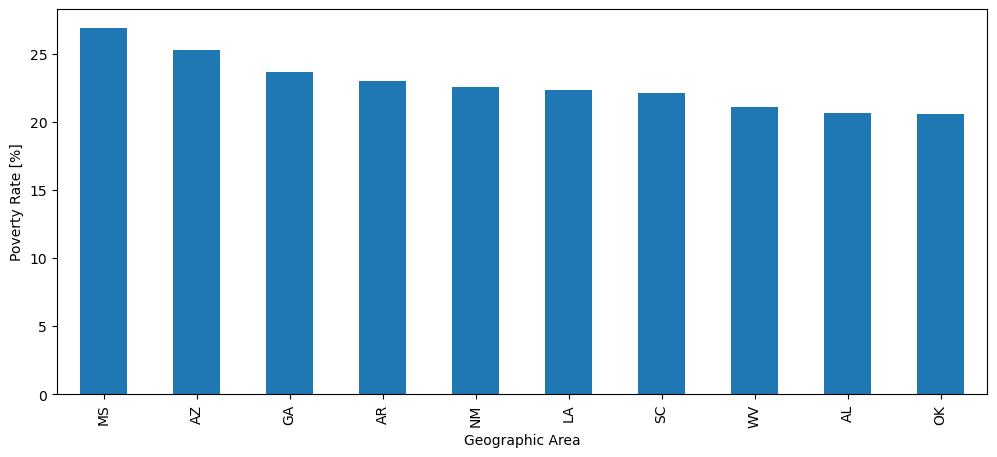

In [13]:
pct_poverty_by_state.head(10).plot(
    kind = "bar", 
    figsize = (12, 5)
)

plt.ylabel("Poverty Rate [%]")

Looks like Missisipi has the highest poverty rate of the bunch

## High School Graduation Rate by US State

In [15]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


We need to convert *percent_completed_hs* into float

In [16]:
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].str.replace("-", "0").astype("float64")

Let's show the **High School Graduation Rate in ascending order of US States**, shall we?

In [59]:
pct_completed_by_state = df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"].mean().sort_values(ascending=False)

Text(0, 0.5, 'Graduation Rate [%]')

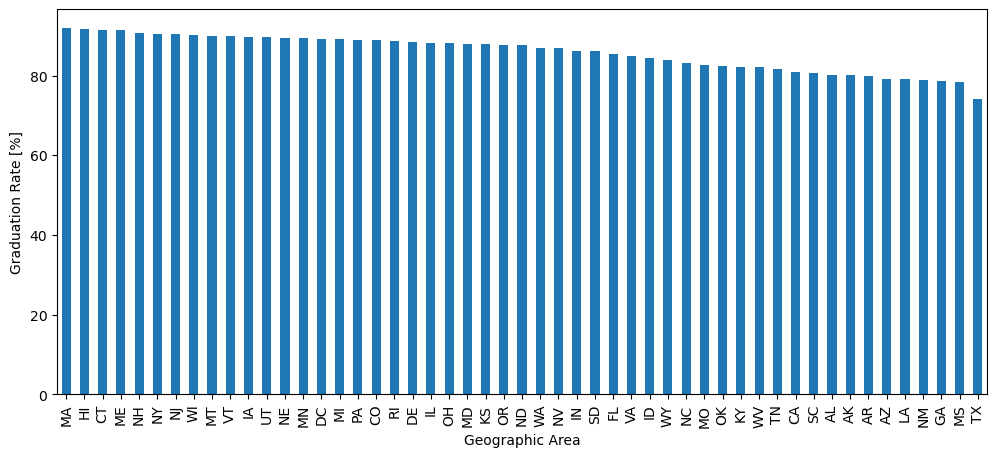

In [60]:
pct_completed_by_state.plot(
    kind = "bar", 
    figsize = (12, 5)
)

plt.ylabel("Graduation Rate [%]")

In [19]:
pct_completed_by_state.head(1)

Geographic Area
MA   92.03
Name: percent_completed_hs, dtype: float64

In [20]:
pct_completed_by_state.tail(1)

Geographic Area
TX   74.09
Name: percent_completed_hs, dtype: float64

Looks like Massachusetts has the highest high school graduation rate and Texas - the lowest

## Relationship between Poverty Rates and High School Graduation Rates

Let's create a **line chart with two y-axes to show if the rations of poverty and high school graduation move together**

In [21]:
pct_poverty_by_state.sort_index(inplace=True) 
pct_completed_by_state.sort_index(inplace=True)

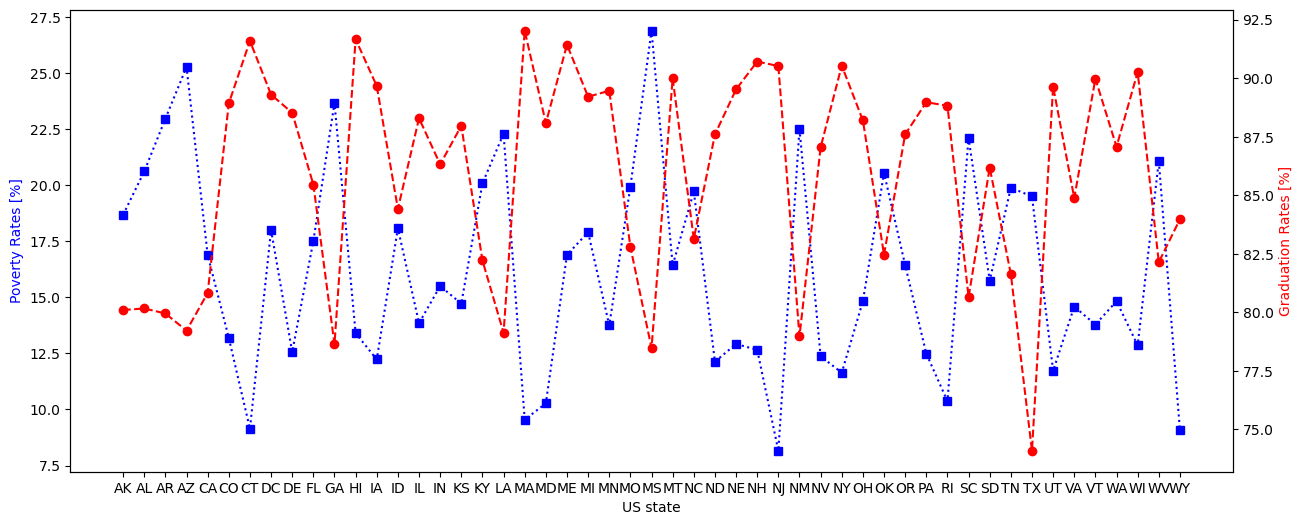

In [22]:
plt.figure(figsize = (15, 6))

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel("US state")
ax1.set_ylabel("Poverty Rates [%]", color = "blue")
ax2.set_ylabel("Graduation Rates [%]", color = "red")

ax1.plot(
    pct_poverty_by_state.index, 
    pct_poverty_by_state, 
    color='blue', 
    linestyle='dotted', 
    marker='s'
)

ax2.plot(
    pct_completed_by_state.index, 
    pct_completed_by_state, 
    color='red', 
    linestyle='dashed', 
    marker='o'
)

How about a **Seaborn `.jointplot()` with a Kernel Density Estimate (KDE)?**

In [23]:
poverty_graduation_comparison = pd.concat([pct_completed_by_state, pct_poverty_by_state], axis=1)
poverty_graduation_comparison

percent_completed_hs  poverty_rate
Geographic Area                                    
AK                              80.10         18.68
AL                              80.16         20.61
AR                              79.95         22.96
AZ                              79.22         25.27
CA                              80.82         16.89
CO                              88.93         13.19
CT                              91.59          9.14
DC                              89.30         18.00
DE                              88.52         12.56
FL                              85.46         17.51
GA                              78.63         23.66
HI                              91.67         13.40
IA                              89.67         12.23
ID                              84.42         18.08
IL                              88.29         13.85
IN                              86.32         15.50
KS                              87.97         14.72
KY                              82.22         20.08
LA                              79.12         22.29
MA                              92.03          9.55
MD                              88.08         10.27
ME                              91.43         16.89
MI                              89.21         17.90
MN                              89.47         13.75
MO                              82.79         19.93
MS                              78.47         26.88
MT                              89.99         16.42
NC                              83.14         19.72
ND                              87.60         12.13
NE                              89.52         12.92
NH                              90.71         12.66
NJ                              90.52          8.16
NM                              78.97         22.51
NV                              87.05         12.37
NY                              90.54         11.64
OH                              88.20         14.83
OK                              82.46         20.55
OR                              87.60         16.44
PA                              88.97         12.49
RI                              88.82         10.37
SC                              80.65         22.11
SD                              86.18         15.75
TN                              81.63         19.89
TX                              74.09         19.50
UT                              89.64         11.72
VA                              84.88         14.59
VT                              89.98         13.79
WA                              87.07         14.83
WI                              90.26         12.86
WV                              82.14         21.08
WY                              83.97          9.06

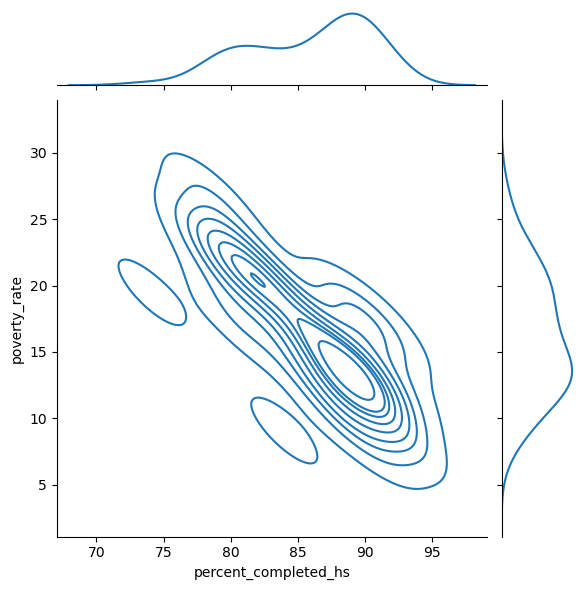

In [24]:
sns.jointplot(
    data = poverty_graduation_comparison, 
    x = "percent_completed_hs", 
    y = "poverty_rate", 
    kind = "kde"
)

Time for some Seaborn's `.lmplot()` to show a **linear regression between the poverty ratio and the high school graduation ratio** 

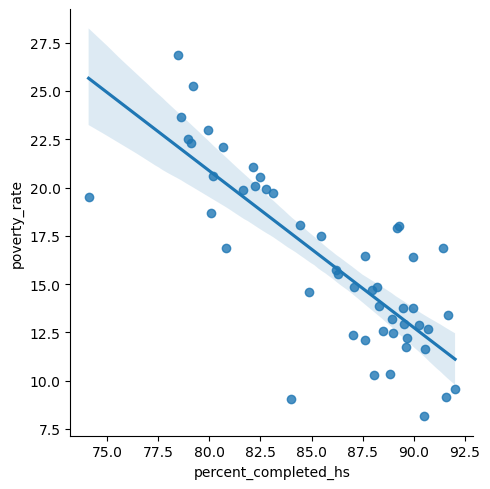

In [25]:
sns.lmplot(
    x ='percent_completed_hs', 
    y ='poverty_rate', 
    data = poverty_graduation_comparison
)

Conclusion: Higher Graduation rates result in lower poverty ratio. Well, duh!

## Donut Chart of People Killed by Race

In [26]:
victims_by_race = df_fatalities["race"].value_counts().rename({ "W": "White", "B": "Black", "H": "Hispanic", "A": "Asian", "N": "Native American", "O": "Others" })
victims_by_race

White              1168
Black               592
Hispanic            401
Asian                36
Native American      29
Others               28
Name: race, dtype: int64

Rerun the cell if you're seeing blanks

In [27]:
px.pie(
    names = victims_by_race.index,
    values = victims_by_race,
    title = "Victims by Race",
    hole = 0.4
)

50% of people killed were white

## Comparing the Total Number of Deaths of Men and Women

In [28]:
deaths_men_women = df_fatalities["gender"].value_counts().rename({"M": "Male", "F": "Female"})
deaths_men_women

Male      2160
Female      94
Name: gender, dtype: int64

<Axes: >

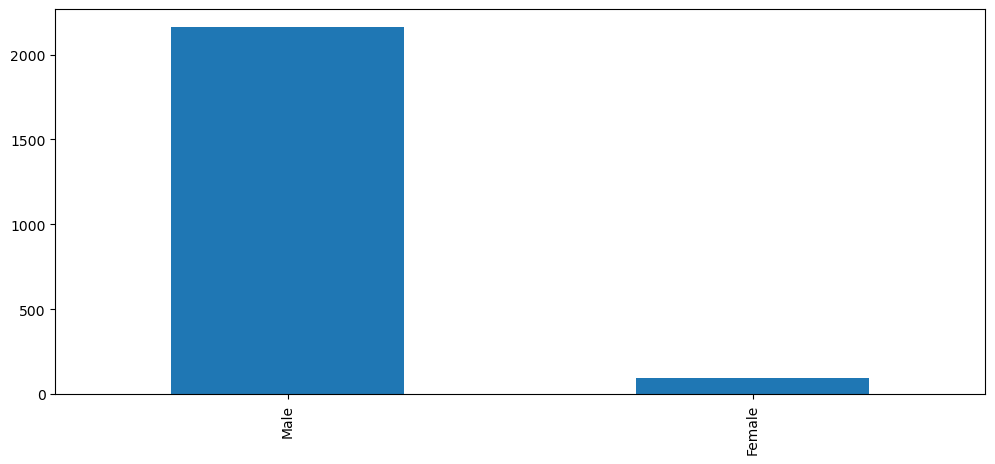

In [29]:
deaths_men_women.plot(
    kind = "bar", 
    figsize = (12, 5)
)

Overwhelming number of people killed were male

## Box Plot Showing the Age and Manner of Death

Rerun the cell if you're seeing blanks

In [30]:
px.box(
    df_fatalities[df_fatalities["gender"] == "M"],
    x = "manner_of_death", 
    y = "age",
    color = "manner_of_death",
    title = "Age and Manner of Death (Male)"
)

Doesn't seem to be much different from each other

Rerun the cell if you're seeing blanks

In [31]:
px.box(
    df_fatalities[df_fatalities["gender"] == "F"],
    x = "manner_of_death", 
    y = "age",
    color = "manner_of_death",
    title = "Age and Manner of Death (Female)"
)

Same thing

## Were People Armed? How many of the people killed by police were armed with guns versus unarmed?

Let's create a bar plot!

In [32]:
weapon_type = df_fatalities["armed"].value_counts()
weapon_type

gun            1247
knife           324
unarmed         165
vehicle         158
toy weapon      102
               ... 
chain saw         1
garden tool       1
pole              1
pick-axe          1
pen               1
Name: armed, Length: 67, dtype: int64

<Axes: title={'center': 'Most Common Weapons'}>

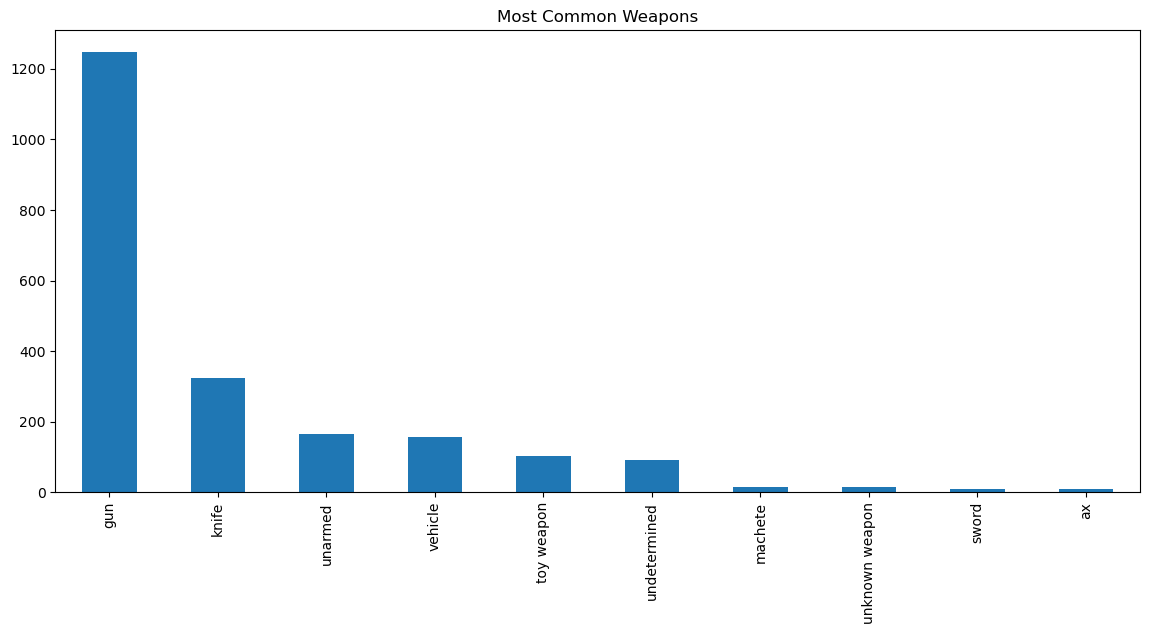

In [33]:
weapon_type[:10].plot(
    kind = "bar",
    figsize = (14,6),
    title = "Most Common Weapons",
)

Looks like the most people killed by police were equiped with some kind of firearm

In [34]:
armed_vs_unarmed = pd.Series({
    "armed": len(df_fatalities[df_fatalities['armed'] != "unarmed"]),
    "unarmed": len(df_fatalities[df_fatalities['armed'] == "unarmed"])
})
armed_vs_unarmed

armed      2089
unarmed     165
dtype: int64

<Axes: title={'center': 'Victims armed vs unarmed'}>

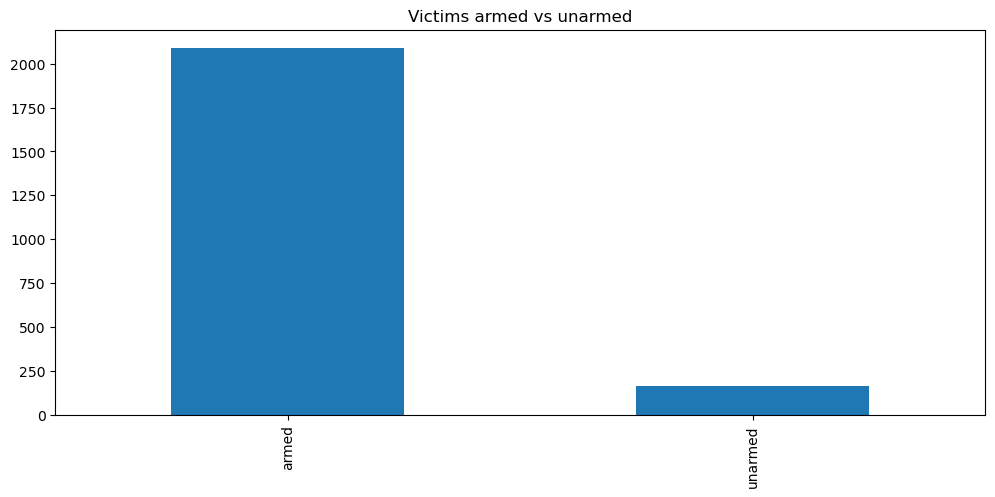

In [35]:
armed_vs_unarmed.plot(
    kind = "bar", 
    figsize = (12, 5),
    title = "Victims armed vs unarmed"
)

Turns out the vast majority of people killed were actually armed

## How Old Were the People Killed?

Histogram and KDE plot is the way to go, don't you think?

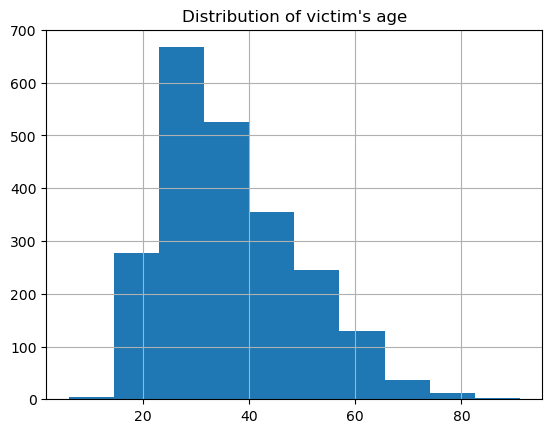

In [36]:
plt.title("Distribution of victim's age")
df_fatalities["age"].hist()
plt.show()

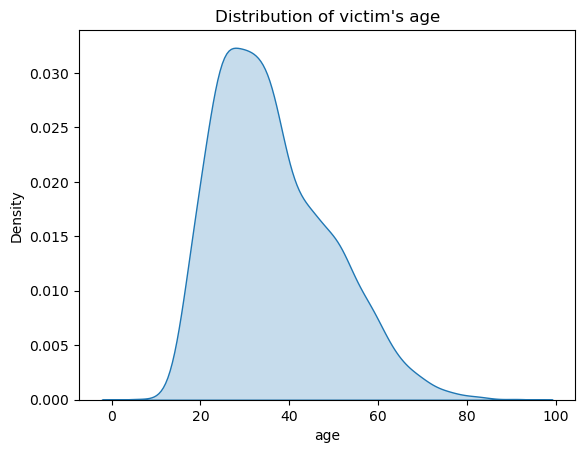

In [37]:
plt.title("Distribution of victim's age")
sns.kdeplot(data=df_fatalities, x = "age", fill=True)
plt.show()

You can clearly see the distribution peaking at around 30

Let's see how it looks for each race

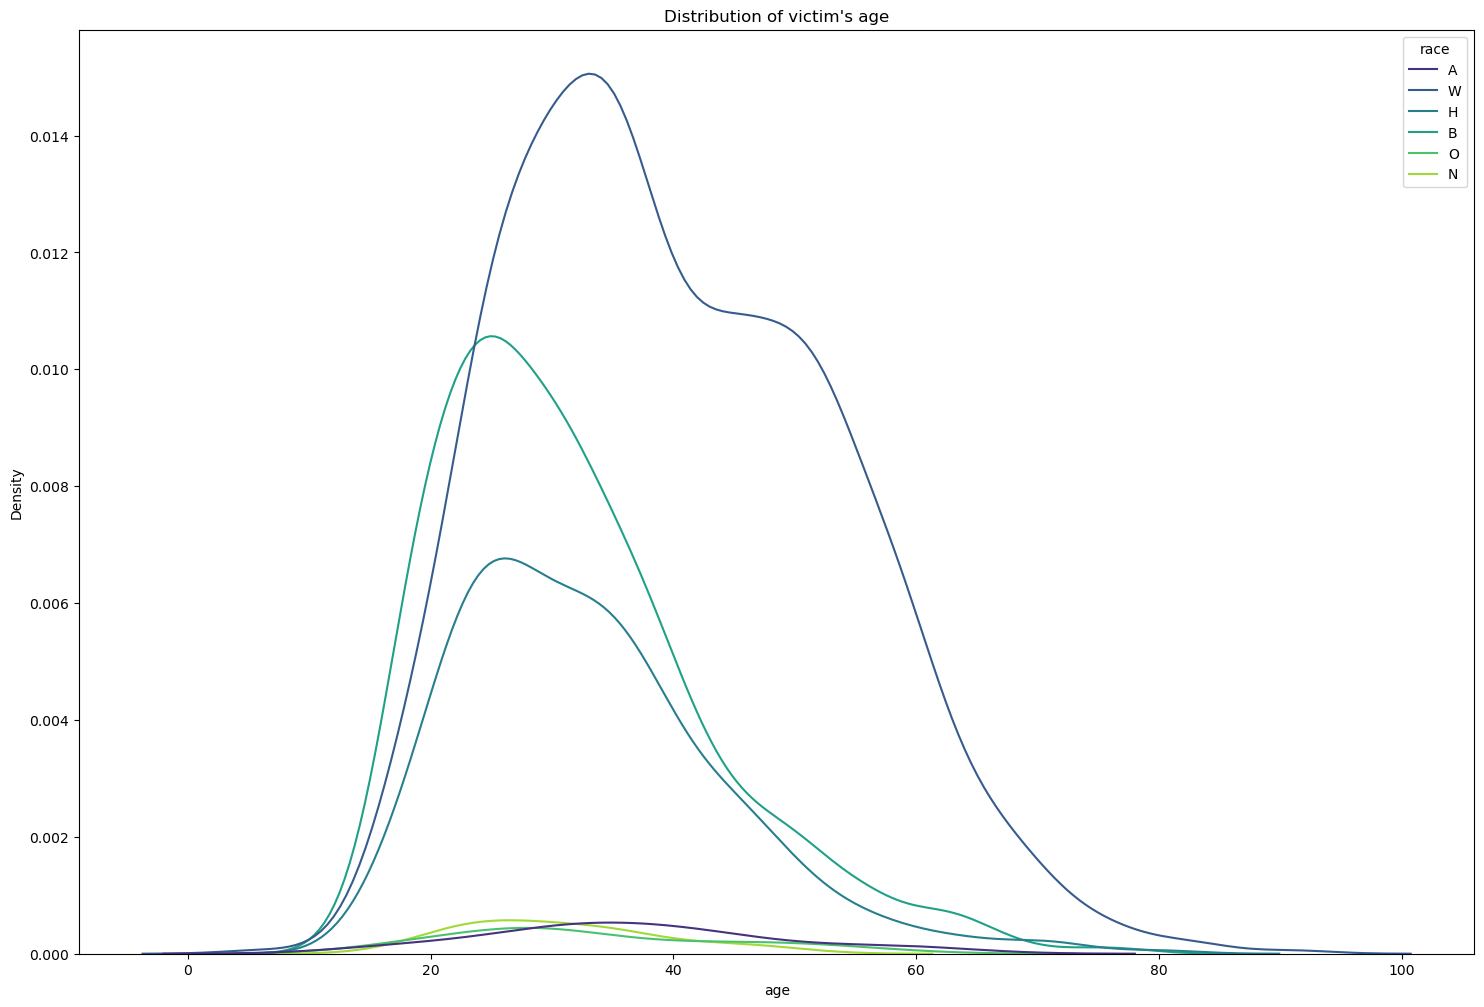

In [38]:
plt.figure(figsize=(18,12))
plt.title("Distribution of victim's age")
sns.kdeplot(
    data = df_fatalities, 
    x = "age",  
    hue = "race",
    palette = "viridis"
)
plt.show()

Looks like the distribution is quite different!

## Race of People Killed

Text(0.5, 1.0, 'Race of People Killed')

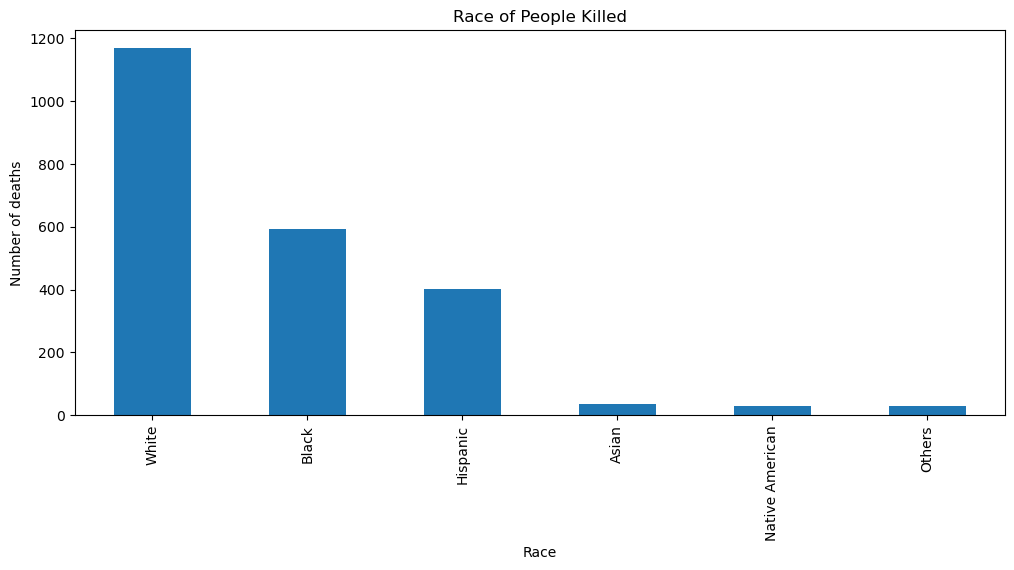

In [39]:
df_fatalities["race"].value_counts().rename({"W": "White", "B": "Black", "H": "Hispanic", "A": "Asian", "N": "Native American", "O": "Others"}).plot(
    kind = "bar", 
    figsize = (12, 5)
)
plt.ylabel("Number of deaths")
plt.xlabel("Race")
plt.title("Race of People Killed")

Looks like the most people killed are white

## Is there a link between Mental Illness and Police Killings?

In [40]:
mental_illness = df_fatalities['signs_of_mental_illness'].value_counts()
mental_illness

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

Text(0.5, 1.0, 'Relationship between police killing victims and mental illness')

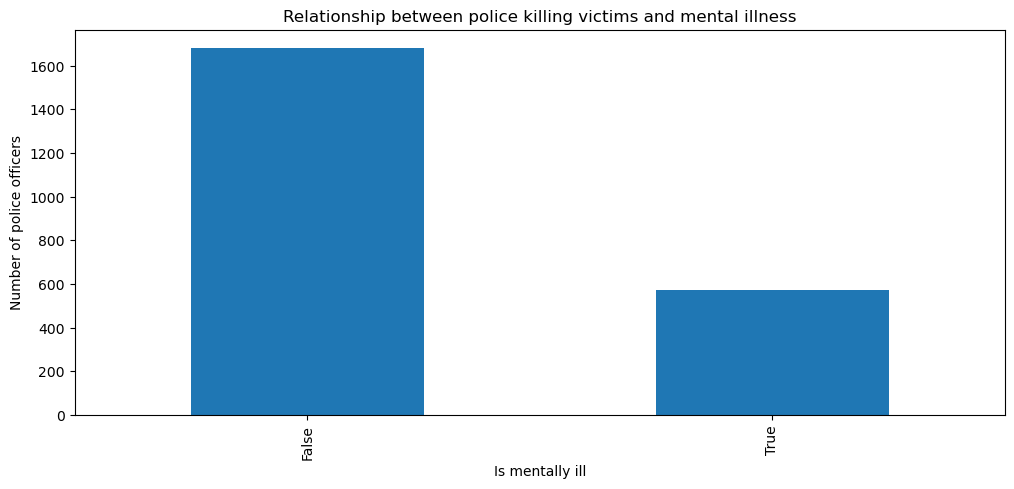

In [41]:
mental_illness.plot(
    kind = "bar", 
    figsize = (12, 5)
)
plt.xlabel("Is mentally ill")
plt.ylabel("Number of police officers")
plt.title("Relationship between police killing victims and mental illness")

Not really, no

## In Which Cities Do the Most Police Killings Take Place?

In [42]:
dangerous_cities = df_fatalities["city"].value_counts().sort_values(ascending=False)[:10]
dangerous_cities

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
San Antonio     15
Miami           15
Indianapolis    14
Name: city, dtype: int64

Text(0, 0.5, 'Number of deaths')

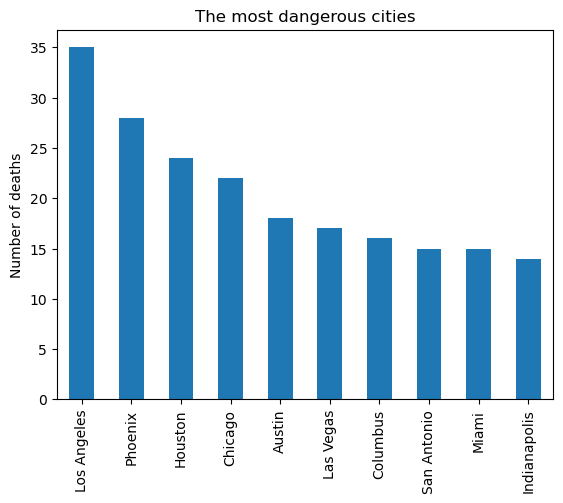

In [43]:
plt.title("The most dangerous cities")
dangerous_cities.plot(kind = "bar")
plt.ylabel("Number of deaths")

Looks like LA is a dangerous place to be!

In [44]:
dangerous_cities_by_race = df_fatalities[df_fatalities["city"].isin(dangerous_cities.index.tolist())].groupby(["city", "race"])["name"].count().unstack(level=1)
dangerous_cities_by_race.fillna(0, inplace=True)
dangerous_cities_by_race.rename({"W": "White", "B": "Black", "H": "Hispanic", "A": "Asian", "N": "Native American", "O": "Others"}, axis=1, inplace=True)
dangerous_cities_by_race

race          Asian  Black  Hispanic  Native American  Others  White
city                                                                
Austin         0.00   3.00      2.00             0.00    0.00  13.00
Chicago        0.00  19.00      1.00             0.00    0.00   2.00
Columbus       0.00   9.00      0.00             0.00    1.00   6.00
Houston        1.00  14.00      5.00             1.00    0.00   3.00
Indianapolis   0.00   9.00      0.00             0.00    0.00   5.00
Las Vegas      0.00   3.00      5.00             0.00    0.00   9.00
Los Angeles    1.00  10.00     18.00             0.00    0.00   6.00
Miami          0.00   7.00      6.00             0.00    0.00   2.00
Phoenix        0.00   2.00     11.00             3.00    0.00  12.00
San Antonio    0.00   2.00     11.00             0.00    0.00   2.00

Text(0, 0.5, 'Number of deaths')

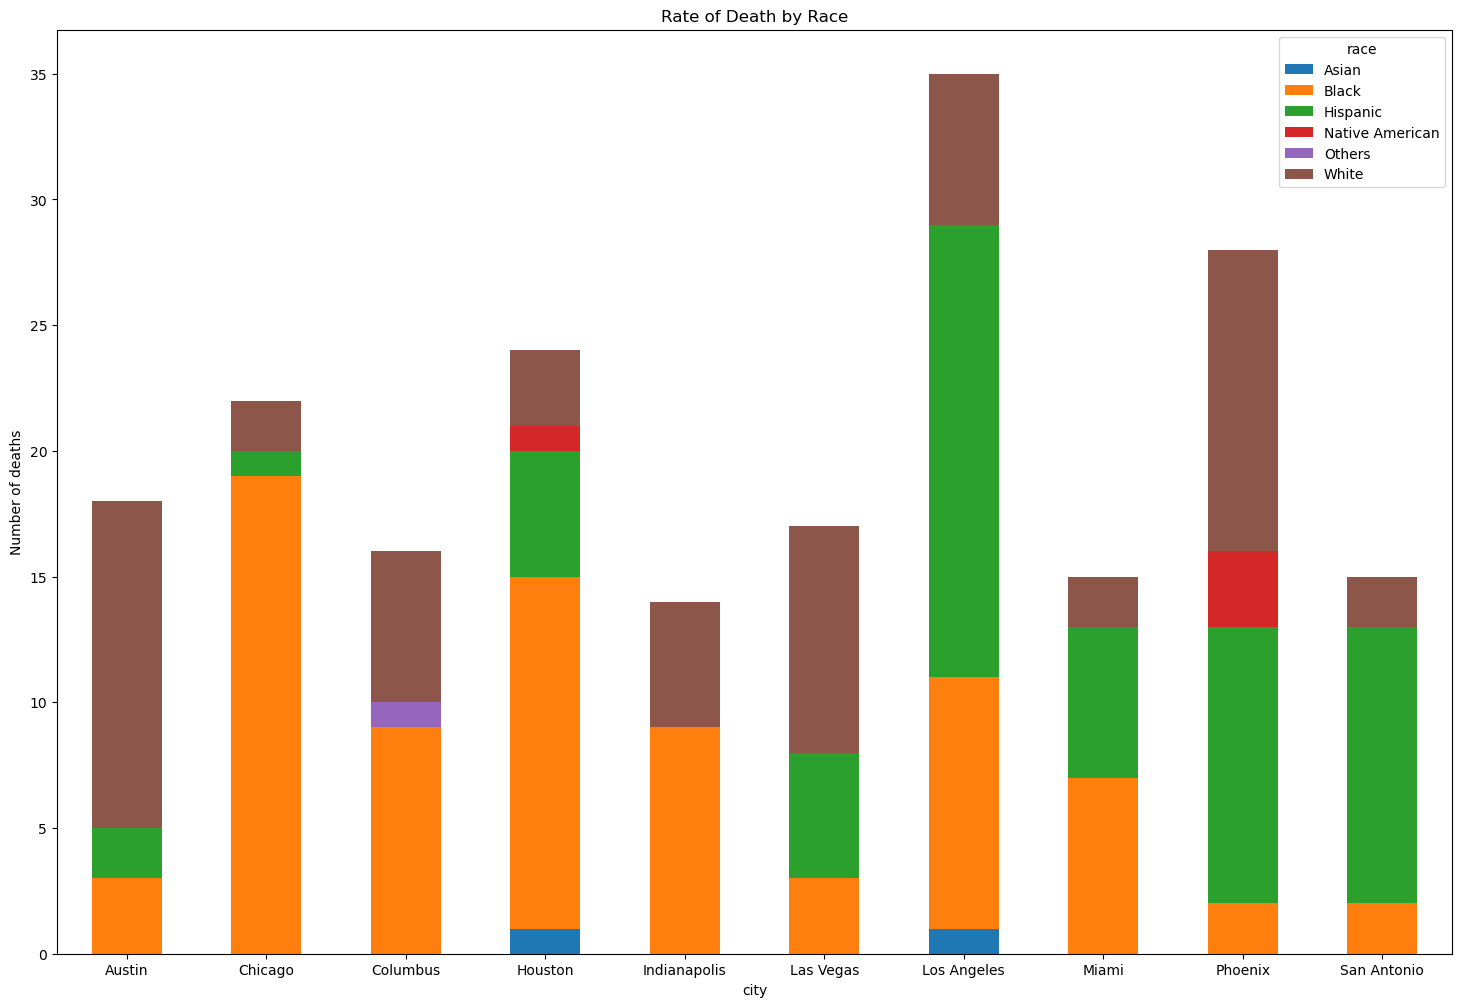

In [45]:
dangerous_cities_by_race.plot(
    kind = "bar",
    stacked = True,
    figsize = (18,12),
    title = "Rate of Death by Race",
    rot = 0
)
plt.ylabel("Number of deaths")

Chicago sticks out to me the most

## Map of Police Killings by US State

Let's create a choropleth map and see which states are the most dangerous

In [46]:
death_by_us_states = df_fatalities['state'].value_counts().sort_index()

Rerun the cell if you're seeing blanks

In [47]:
px.choropleth(
    data_frame = death_by_us_states,
    locations = death_by_us_states.index,
    color = death_by_us_states.values,
    locationmode = "USA-states",
    scope = "usa",
    title = "Killings by Police",
    color_continuous_scale="RdYlGn_r",
)

I don't wanna live in Cali or Texas anymore!

## Number of Police Killings Over Time

In [48]:
deaths_by_date = df_fatalities['date'].value_counts().sort_index()

Text(0, 0.5, 'Number of deaths on average')

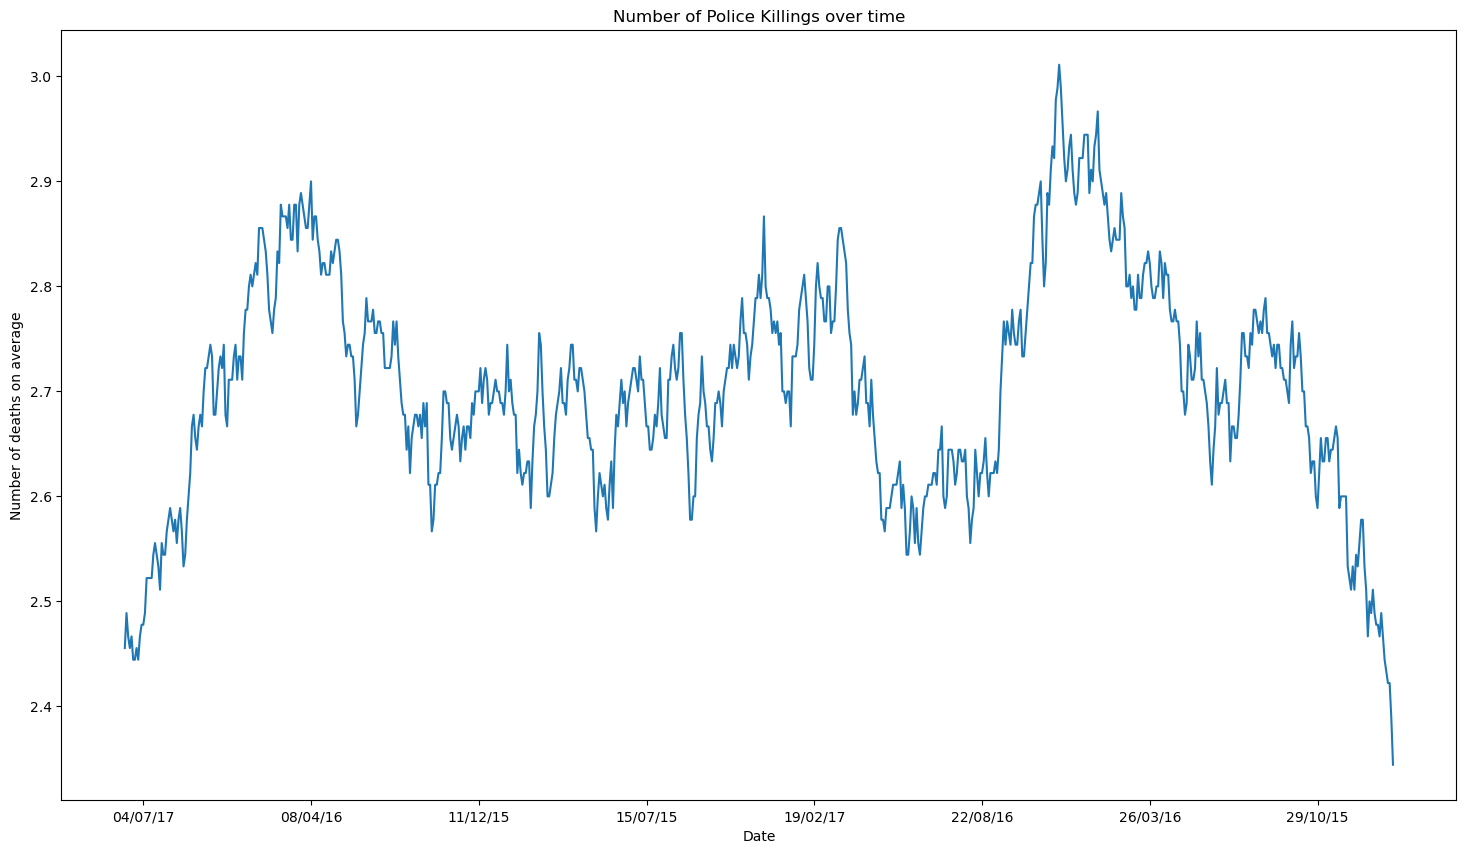

In [52]:
deaths_by_date.rolling(90).mean().plot(
    title = "Number of Police Killings over time",
    figsize = (18,10)
)
plt.xlabel("Date")
plt.ylabel("Number of deaths on average")

The number of police killings seems to decrease